In [ ]:
!which pip

In [ ]:
pwd

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def parse_yolo_annotation(ann_file, image_width, image_height):
    with open(ann_file, 'r') as file:
        lines = file.readlines()

    boxes = []
    for line in lines:
        values = line.strip().split()
        class_label = int(values[0])
        x_center, y_center, width, height = map(float, values[1:])

        # Convert YOLO format to absolute coordinates
        xmin = max(0, int((x_center - width / 2) * image_width))
        ymin = max(0, int((y_center - height / 2) * image_height))
        xmax = min(int((x_center + width / 2) * image_width), image_width)
        ymax = min(int((y_center + height / 2) * image_height), image_height)

        boxes.append({
            'class': class_label,
            'xmin': xmin,
            'ymin': ymin,
            'xmax': xmax,
            'ymax': ymax
        })

    return boxes

def plot_bounding_box(image, ann_file):
    image_width, image_height = image.size
    boxes = parse_yolo_annotation(ann_file, image_width, image_height)

    # Create figure and axes
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Add bounding boxes to the image
    for box in boxes:
        xmin, ymin, xmax, ymax = box['xmin'], box['ymin'], box['xmax'], box['ymax']
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Add class label
        class_label = box['class']
        ax.text(xmin, ymin - 5, f'{class_label}', color='r', fontsize=8, weight='bold')

    plt.show()

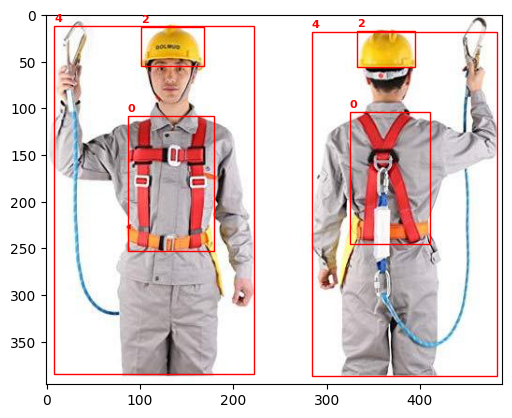

In [38]:
import PIL
path = '/home/dataset/train'
image_file = f'{path}/images/belt_01_train_2.jpg'
ann_file = f'{path}/labels/belt_01_train_2.txt'
image = PIL.Image.open(image_file)
plot_bounding_box(image, ann_file)

In [43]:
!cat /home/dataset/train/labels/belt_01_train_2.txt

0 0.271984 0.458333 0.188139 0.366162
0 0.754601 0.440657 0.175869 0.356061
2 0.277096 0.085859 0.141104 0.106061
2 0.746421 0.092172 0.126789 0.098485
4 0.235174 0.501263 0.437628 0.941919
4 0.784254 0.511364 0.406953 0.931818


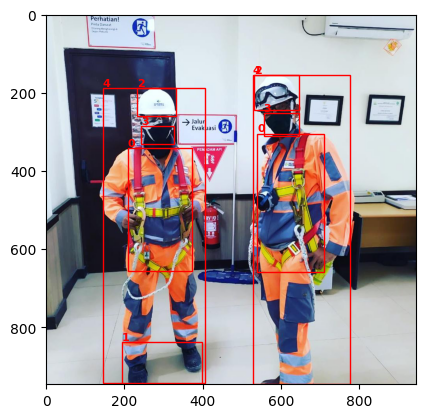

In [37]:
path = '/home/dataset/belt/train'
image_file = f'{path}/images/belt_01_train_13.jpg'
ann_file = f'{path}/labels/belt_01_train_13.txt'
image = PIL.Image.open(image_file)
plot_bounding_box(image, ann_file)